In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [32]:
df['LogPassengers'] = np.log(df['Passengers'])

In [33]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [34]:
import pmdarima as pm

In [35]:
model = pm.auto_arima( train['Passengers'],
                    trace=True,
                    suppress_warnings=True,
                    seasonal=True,
                    m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.32 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.21 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.81 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.31 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=907.066, Time=2.32 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.27 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.43 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.13 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.32 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   :

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Mon, 20 Mar 2023   AIC                            905.686
Time:                                    15:55:35   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

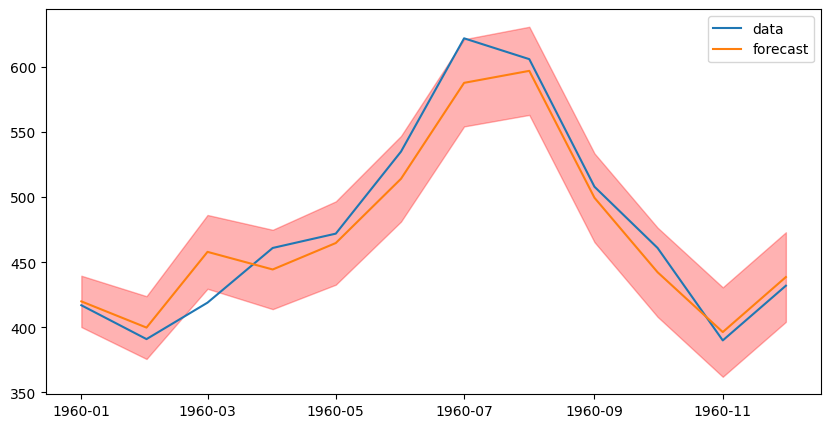

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between( test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)

ax.legend()

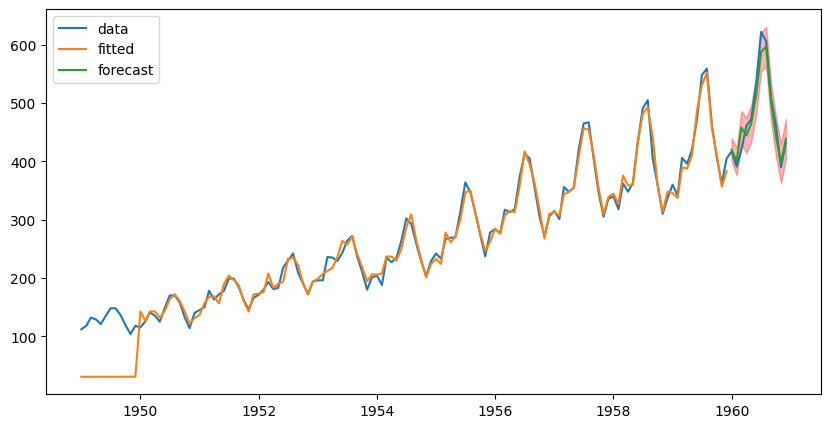

In [39]:
train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)

ax.legend()

In [40]:
logmodel = pm.auto_arima( train['LogPassengers'],
                    trace=True,
                    suppress_warnings=True,
                    seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-438.645, Time=1.91 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=0.76 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.54 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.04 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.328, Time=1.59 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.59 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.321, Time=2.74 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.709, Time=1.38 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=3.30 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.576, Time=1.94 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.47 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-442.277, Time=1.68 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.556, Time=2.37 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [41]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Mon, 20 Mar 2023   AIC                           -448.052
Time:                                      15:56:24   BIC                           -434.114
Sample:                                  01-01-1949   HQIC                          -442.392
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0193      0.009      2.154      0.031       0.002       0.037
ar.L1          0.5997      0.083      7.262      0.000       0.438       0.762
ar.L2          0.2422      0.085      2.859      0.004       0.076       0.408
ma.S.L12      -0.5669      0.105     -5.413      0.000      -0.772      -0.362
sigma2         0.0012      0.000      8.190      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.08
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

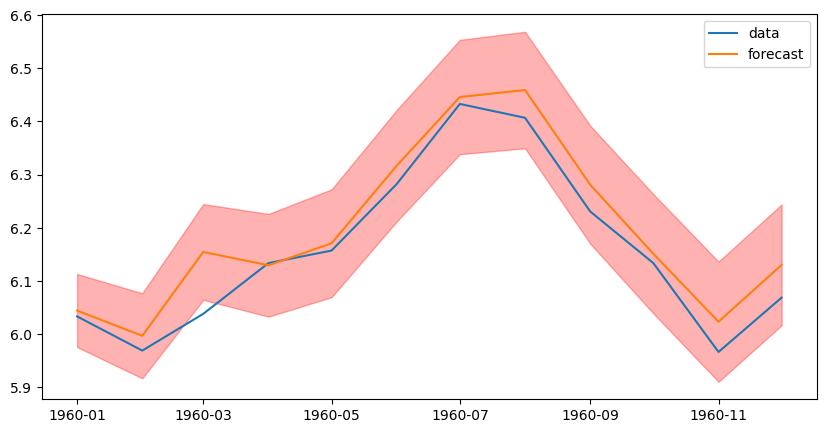

In [42]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
ax.legend()

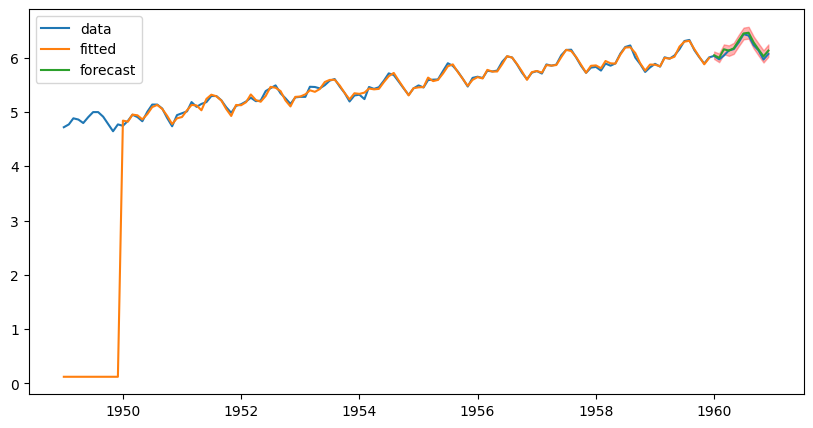

In [43]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
ax.legend()

In [44]:
### forecast RMSE
def rmse(t, y):
    return np.sqrt(np.mean((t-y)**2))

In [45]:
print(f"Non-logged RMSE: {rmse(test['Passengers'], test_pred)}")
print(f"Logged RMSE: {rmse(test['Passengers'], np.exp(test_pred_log))}")

Non-logged RMSE: 18.536468895437906
Logged RMSE: 23.05570078801901


In [46]:
### Non-seasonal Auto ARIMA
model = pm.auto_arima( train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False
                      )

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-240.135, Time=0.34 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-216.024, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-245.881, Time=0.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-246.403, Time=0.45 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-229.057, Time=0.27 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-227.139, Time=0.29 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-251.428, Time=0.55 sec
 ARIMA(5,1,0)(0,0,0)[0] i

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 1)   Log Likelihood                 226.807
Date:                Mon, 20 Mar 2023   AIC                           -423.613
Time:                        15:56:55   BIC                           -380.485
Sample:                    01-01-1949   HQIC                          -406.089
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0063      0.006      1.113      0.266      -0.005       0.017
ar.L1          0.0335      0.087      0.383      0.702      -0.138       0.205
ar.L2         -0.0758      0.068     -1.120      0.263      -0.209       0.057
ar.L3         -0.0355      0.066     -0.534      0.593      -0.166       0.095
ar.L4         -0.0990      0.071     -1.404      0.160      -0.237       0.039
ar.L5          0.0042      0.065      0.065      0.948      -0.122       0.131
ar.L6         -0.0531      0.067     -0.797      0.426      -0.184       0.078
ar.L7         -0.0410      0.071     -0.575      0.565      -0.181       0.099
ar.L8         -0.1169      0.065     -1.785      0.074      -0.245       0.011
ar.L9          0.0063      0.077      0.082      0.934      -0.144       0.157
ar.L10        -0.0656      0.065     -1.013      0.311      -0.192       0.061
ar.L11         0.0016      0.071      0.023      0.982      -0.137       0.140
ar.L12         0.7998      0.062     12.826      0.000       0.678       0.922
ma.L1         -0.3691      0.123     -3.006      0.003      -0.610      -0.128
sigma2         0.0016      0.000      7.006      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.54
Prob(Q):                              0.96   Prob(JB):                         0.28
Heteroskedasticity (H):               0.37   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

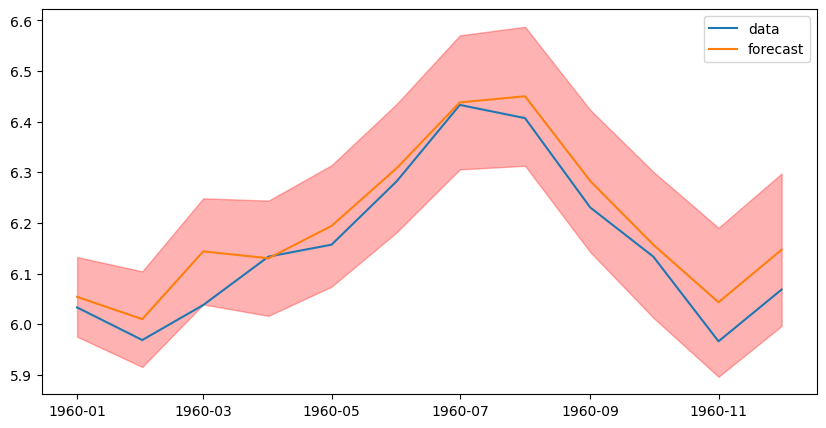

In [48]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
ax.legend()

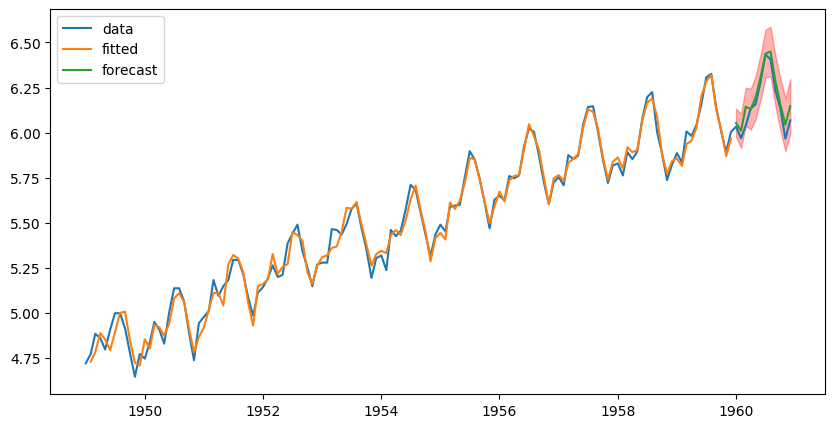

In [49]:
train_pred = model.predict_in_sample(start=1, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
ax.legend()

In [50]:
rmse(test['Passengers'], np.exp(test_pred))

23.926713408566183